# Import the GIS module

In [ ]:
from arcgis.gis import GIS

# Connect to ArcGIS Enterprise using the GIS Module

In [ ]:
import getpass
password = getpass.getpass("Enter password: ")
# Logging into Portal for ArcGIS
gisAE = GIS("https://clt-ramseth8l.esri.com/portal/home","PortalAdmin", password)

print("Successfully logged in as: " + gisAE.properties.user.username)

# Connect to ArcGIS Online using the GIS Module

In [ ]:
import getpass
password = getpass.getpass("Enter password: ")

#Logging into ArcGIS Online
gisAGOL = GIS("https://www.arcgis.com","BenRamsethEsri5", password)

print("Successfully logged in as: " + gisAGOL.properties.user.username)


In [ ]:
user=gisAGOL.users.me


In [ ]:
user


In [ ]:
user["firstName"]


In [ ]:
user.lastName
user.

# Create a map zoomed to New York City

In [50]:
map1 = gisAGOL.map("New York, NY")
map1


# Search for content

<Item title:"Disc Golf Courses" type:Feature Layer Collection owner:BenRamsethEsri5>
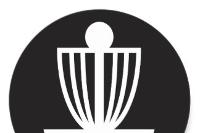

<Item title:"FDNY_buf" type:Feature Layer Collection owner:BenRamsethEsri5>
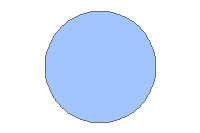

<Item title:"Charlotte Disc Golf Courses" type:Web Map owner:BenRamsethEsri5>
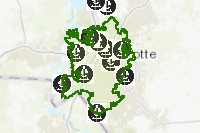

<Item title:"Disc Golf Courses in San Diego" type:Web Mapping Application owner:BenRamsethEsri5>
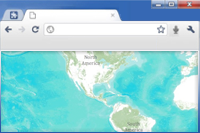

<Item title:"RoadWarrior" type:CSV owner:BenRamsethEsri5>
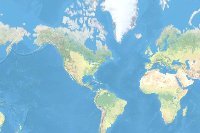

<Item title:"Intersect of DiscGolfCourses and CityBoundaryCharlotte" type:Feature Layer Collection owner:BenRamsethEsri5>
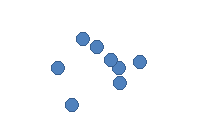

<Item title:"ports_buffers_Rating1" type:Feature Layer Collection owner:BenRamsethEsri5>

<Item title:"HorryCountyDemo2-DIR" type:Web Mapping Application owner:BenRamsethEsri5>
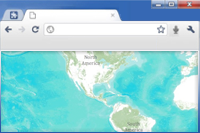

<Item title:"ports_buffers_Rating4" type:Feature Layer Collection owner:BenRamsethEsri5>

<Item title:"ports_buffers_Rating48" type:Feature Layer Collection owner:BenRamsethEsri5>

In [51]:
from IPython.display import display
items = gisAGOL.content.search('*')
for item in items:
    display(item)
    

In [52]:
gisAGOL.properties.portalName


'ArcGIS Online'

In [53]:
gisAGOL.properties.customBaseUrl


'maps.arcgis.com'

In [54]:
gisAGOL.properties.availableCredits

2976.6362

# Working with the map

In [55]:
map2 = gisAGOL.map("New York, NY")
map2

In [56]:
map2.zoom = 4


In [57]:
map2.basemap


'topo'

In [58]:
map2.basemap = 'dark-gray'

In [59]:
map2.height = '600px'

In [60]:
map2.center = [34,-118]

In [61]:
map2.zoom = 12

In [62]:
map2.center = [40.7128,-74.0059]

In [63]:
search_result = gisAGOL.content.search('title:Police Precincts',
                                  item_type = 'Feature Layer')
search_result


[<Item title:"Police Precincts" type:Feature Layer Collection owner:BenRamsethEsri5>]

In [64]:
map2.add_layer(search_result[0])

# Locating an address

In [65]:
from arcgis.geocoding import geocode

In [66]:
single_line_address = "275 7th Ave, New York, NY 10001"

In [67]:
single_line_address

'275 7th Ave, New York, NY 10001'

In [68]:
esriNYC = geocode(single_line_address)[0]
popup = { 
    "title" : "Esri NYC Office", 
    "content" : esriNYC['address']
    }
map2.draw(esriNYC['location'], popup)

# Org Administration

<Group title:"Webinar_Group" owner:BenRamsethEsri5>
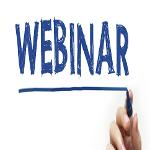

In [69]:
webinar_group = gisAGOL.groups.create(title='Webinar_Group',
                                    tags = 'nyc, webinar',
                                    description = 'Creating a group to show an admin workflow in action',
                                    snippet = 'webinar',
                                    access = 'org',
                                    is_invitation_only = 'False',
                                    thumbnail = r'C:\PythonAPIWebinar\images\webinar.jpg')
webinar_group

In [70]:
webinar_group = gisAGOL.groups.search('Webinar_Group')
webinar_group

[<Group title:"Webinar_Group" owner:BenRamsethEsri5>]

<Group title:"Webinar_Group" owner:BenRamsethEsri5>
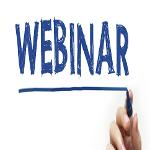

In [71]:
webinar_group[0]

In [72]:
group = webinar_group[0]
# webinar_group.add_users(['User1_L1', 'User2_L2', 'User3_L2'])
group.add_users(['User1_L1', 'User2_L2', 'User3_L2'])

{'notAdded': []}

# Content creation...Add csv as item and publish as feature layer

In [73]:
csv_path = r"C:\PythonAPIWebinar\data\Emergency_Response_Incidents_Webinar.csv"
csv_properties={'title':'Emergency_Response_Incidents_Webinar',
                'description':'Emergency Response Incidents in Manhattan',
                'tags':'nyc, Emergency Response'}
thumbnail_path = r"C:\PythonAPIWebinar\images\NYC1.jpg"

Emergency_Response_Incidents_csv_item = gisAGOL.content.add(item_properties=csv_properties, data=csv_path,
                                     thumbnail = thumbnail_path)

In [74]:
Emergency_Response_Incidents_feature_layer_item = Emergency_Response_Incidents_csv_item.publish()

<Item title:"Emergency_Response_Incidents_Webinar" type:Feature Layer Collection owner:BenRamsethEsri5>
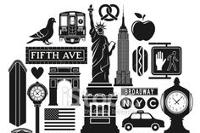

In [75]:
Response_Incidents = gisAGOL.content.search('Emergency_Response_Incidents_Webinar',
                                  item_type = 'Feature Layer')
Response_Incidents[0]

In [76]:
map3 = gisAGOL.map('New York')
map3.basemap = 'dark-gray'
map3.add_layer(Response_Incidents[0])
map3

In [77]:
map4 = gisAGOL.map('New York')
map4.basemap = 'dark-gray'
map4.add_layer(Response_Incidents[0],{
                "renderer":"HeatmapRenderer",
                "opacity":0.75})
map4

# Add shapefile as item and publish as feature layer

In [78]:
data = r"C:\PythonAPIWebinar\data\BoroughBoundaries_Webinar.zip"
shpfile = gisAGOL.content.add({}, data)

In [79]:
shpfile

<Item title:"BoroughBoundaries_Webinar" type:Shapefile owner:BenRamsethEsri5>

In [80]:
published_service = shpfile.publish()

In [81]:
search_result = gisAGOL.content.search('title: BoroughBoundaries_Webinar',
                                  item_type = 'Feature Layer')
search_result

[<Item title:"BoroughBoundaries_Webinar" type:Feature Layer Collection owner:BenRamsethEsri5>]

In [82]:

BoroughBoundaries_item = search_result[0]
map3.add_layer(BoroughBoundaries_item)

In [83]:
map3.add_layer(Response_Incidents[0])

# Share content to group

In [ ]:
Response_Incidents.share(groups=webinar_group.id)
BoroughBoundaries_item.share(groups=webinar_group.id)